<a href="https://colab.research.google.com/github/praphul-kumar-patel/Calculator/blob/main/Hand_Written_Digit_Prediction_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hand Wrtten Digit Prediction - classification Analysis**

The digit dataset consists of 8x8 pixel images of digit. The images attribute of the dataset stores 8x8 arrays of grayscale values of each images. We will use these array to visualize the first 4 images. The target attribute of the dataset stores the digit each image represents


**Import Library**

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

**Imprt Data**

In [4]:
from sklearn.datasets import load_digits

In [5]:
df = load_digits()

**Describe Data**

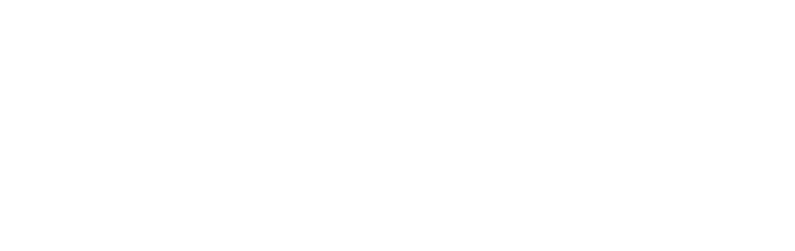

In [6]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()

**Data Visualization**

In [7]:
ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
ax.set_title("Training: %i" % label)

Text(0.5, 1.0, 'Training: 3')

**Data Preprocessing**

In [8]:
df.images.shape

(1797, 8, 8)

In [9]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [10]:
df.images[0].shape

(8, 8)

In [11]:
len(df.images)

1797

In [12]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [13]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [14]:
data[0].shape

(64,)

In [15]:
data.shape

(1797, 64)

**Define Target Variable (y) and feature Variable (x)**

In [16]:
data.min()

0.0

In [17]:
data.max()

16.0

In [24]:
data = data/16

In [25]:
data.min()

0.0

In [26]:
data.max()

1.0

In [27]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

**Train Test Split**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data, df.target, test_size=0.3)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()

In [43]:
rf.fit(X_train, y_train)

RandomForestClassifier()

**Prediction**

In [44]:
y_pred = rf.predict(X_test)

In [45]:
y_pred

array([0, 0, 3, 8, 8, 7, 4, 4, 3, 3, 2, 5, 6, 1, 7, 5, 0, 7, 5, 2, 1, 3,
       4, 7, 2, 1, 5, 7, 0, 6, 7, 4, 6, 4, 0, 3, 6, 0, 8, 5, 5, 1, 5, 8,
       0, 5, 3, 7, 0, 8, 9, 9, 2, 3, 5, 5, 3, 2, 9, 6, 4, 6, 6, 7, 8, 6,
       6, 3, 2, 5, 2, 7, 8, 3, 2, 2, 5, 2, 0, 2, 3, 7, 7, 0, 4, 8, 7, 0,
       9, 3, 1, 0, 1, 1, 7, 9, 2, 8, 6, 8, 0, 9, 9, 9, 9, 2, 3, 5, 6, 8,
       7, 6, 4, 9, 5, 3, 8, 5, 5, 3, 6, 0, 4, 9, 9, 3, 7, 6, 0, 6, 9, 1,
       7, 2, 4, 0, 4, 3, 8, 1, 9, 8, 7, 2, 0, 7, 4, 0, 6, 0, 7, 9, 7, 8,
       0, 4, 7, 0, 1, 8, 3, 9, 1, 4, 1, 4, 7, 1, 7, 4, 4, 1, 8, 2, 5, 5,
       0, 2, 4, 1, 0, 8, 8, 9, 1, 4, 5, 3, 5, 0, 8, 4, 6, 8, 2, 7, 6, 6,
       9, 1, 7, 0, 7, 7, 3, 0, 8, 4, 1, 0, 1, 5, 6, 2, 1, 7, 7, 1, 5, 6,
       1, 7, 8, 0, 6, 2, 8, 3, 4, 0, 5, 8, 2, 2, 7, 4, 8, 5, 3, 5, 5, 1,
       1, 1, 9, 7, 4, 0, 1, 3, 3, 3, 9, 7, 1, 9, 6, 2, 9, 8, 9, 3, 2, 7,
       6, 2, 0, 9, 9, 2, 9, 4, 3, 6, 4, 1, 4, 8, 9, 0, 5, 6, 1, 5, 0, 8,
       7, 6, 8, 3, 2, 7, 9, 5, 8, 3, 1, 4, 2, 7, 3,

**Explaination**

In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
confusion_matrix(y_test, y_pred)

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 50,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 51,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 64,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0, 50,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 60,  1,  1],
       [ 0,  1,  0,  0,  1,  0,  0,  0, 45,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 50]])

In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.96      1.00      0.98        48
           2       1.00      0.98      0.99        51
           3       1.00      0.98      0.99        51
           4       0.94      0.98      0.96        52
           5       0.98      0.97      0.98        66
           6       1.00      0.96      0.98        52
           7       0.98      0.97      0.98        62
           8       0.94      0.94      0.94        48
           9       0.94      0.98      0.96        51

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

